**Chapter 6 – Decision Trees**

_This notebook contains all the sample code and solutions to the exercises in chapter 6._

# Setup

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id)

def save_fig(fig_id, tight_layout=True):
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(image_path(fig_id) + ".png", format='png', dpi=300)

# Training and visualizing

In [2]:
# from sklearn.datasets import load_iris
# from sklearn.tree import DecisionTreeClassifier

# iris = load_iris()
# X = iris.data[:, 2:] # petal length and width
# y = iris.target

# tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
# tree_clf.fit(X, y)

# Practice
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [3]:
# from sklearn.tree import export_graphviz

# export_graphviz(
#         tree_clf,
#         out_file=image_path("iris_tree.dot"),
#         feature_names=iris.feature_names[2:],
#         class_names=iris.target_names,
#         rounded=True,
#         filled=True
#     )

# Practice
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file = image_path("iris_tree.dot"),
    feature_names = iris.feature_names[2:],
    class_names = iris.target_names,
    rounded = True,
    filled = True
)

Saving figure decision_tree_decision_boundaries_plot


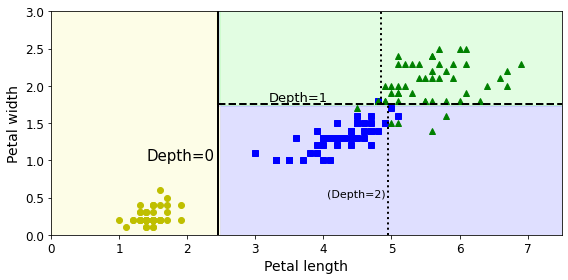

Saving figure decision_tree_decision_boundaries_plot


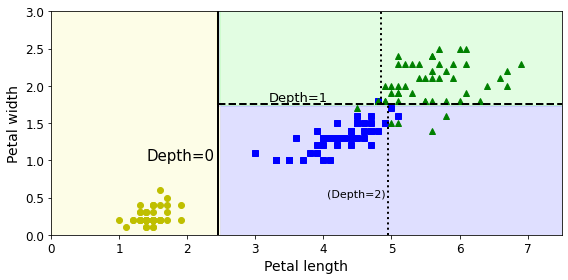

In [4]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

save_fig("decision_tree_decision_boundaries_plot")
plt.show()

# Practice
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new =np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0', "#9898ff", '#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58', '#4c4c7f', '#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:,1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

save_fig("decision_tree_decision_boundaries_plot")
plt.show()

# My Notes: Using Graphviz package to display in Jupyter notebook

In [5]:
import os
iris_path = os.getcwd() + "\\images\\decision_trees\\iris_tree.dot"

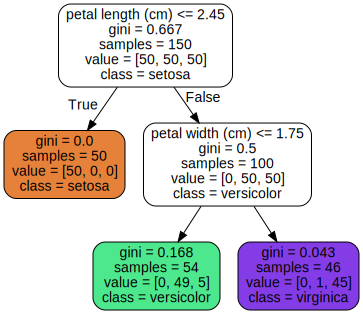

In [6]:
import graphviz

with open(iris_path) as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

My Notes: 

samples ==> How many training instances it applies to for the node

values ==> [setosa, versicolor, viginica], how many of the instances belong to each class

gini ==> Measures the *impurity* levels, e.g: if gini=0, it's pure, all the instances belong to the same class

For class *setosa*, the root node predicts it's the most purest form (there's no other classes except Setosa), hence for depth 0, it picks the petal length feature.

# Predicting classes and class probabilities

My Notes: Getting the probability for each class based on the petal's length and width

In [7]:
# tree_clf.predict_proba([[5, 1.5]])

# Practice
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [8]:
# tree_clf.predict([[5, 1.5]])
tree_clf.predict([[5, 1.5]])

# My Notes: It predicts class 1 which is Versicolor

array([1])

# Sensitivity to training set details

In [9]:
# X[(X[:, 1]==X[:, 1][y==1].max()) & (y==1)] # widest Iris-Versicolor flower

# Practice
X[(X[:, 1]==X[:, 1][y==1].max()) & (y==1)] # widest Iris-Versicolor flower

array([[4.8, 1.8]])

In [10]:
# My Notes:
y == 2

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [11]:
# not_widest_versicolor = (X[:, 1]!=1.8) | (y==2)
# X_tweaked = X[not_widest_versicolor]
# y_tweaked = y[not_widest_versicolor]

# tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
# tree_clf_tweaked.fit(X_tweaked, y_tweaked)

# Practice
not_widest_versicolor = (X[:, 1]!=1.8) | (y==2) # My Notes: Either extract the feature which is not 1.8 OR get the Versicolor class
X_tweaked = X[not_widest_versicolor]
y_tweaked = y[not_widest_versicolor]

tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_tweaked, y_tweaked)

DecisionTreeClassifier(max_depth=2, random_state=40)

# Stopped here 14/5/2020

Saving figure min_samples_leaf_plot


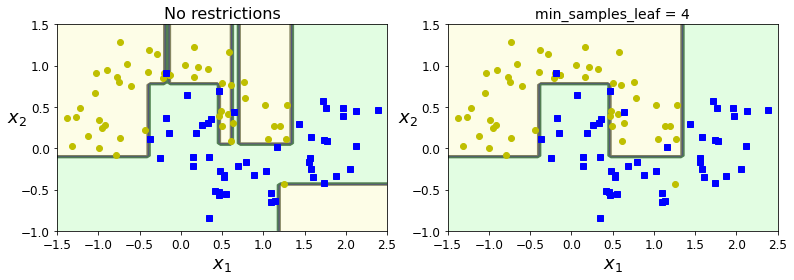

In [12]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.subplot(122)
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)

save_fig("min_samples_leaf_plot")
plt.show()

# Practice
# from sklearn.datasets import make_moons
# Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

# deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
# deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
# deep_tree_clf1.fit(Xm, ym)
# deep_tree_clf2.fit(Xm, ym)

# plt.figure(figsize=(11,4))
# plt.subplot(121)
# plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
# plt.title("No restrictions", fontsize=16)
# plt.subplot(122)
# plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
# plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)

# save_fig("min_samples_leaf_plot")
# plt.show()

# Regression trees

In [13]:
# # Quadratic training set + noise
# np.random.seed(42)
# m = 200
# X = np.random.rand(m, 1)
# y = 4 * (X - 0.5) ** 2
# y = y + np.random.randn(m, 1) / 10

# Practice
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [14]:
# from sklearn.tree import DecisionTreeRegressor

# tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
# tree_reg.fit(X, y)

# Practice
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [18]:
# export_graphviz(
#         tree_reg1,
#         out_file=image_path("regression_tree.dot"),
#         feature_names=["x1"],
#         rounded=True,
#         filled=True
#     )

# Practice
export_graphviz(
    tree_reg,
    out_file = image_path("regression_tree.dot"),
    feature_names=["x1"],
    rounded=True,
    filled=True
)

# My Notes: Rendering the tree

In [19]:
import os
regression_tree_path = os.getcwd() + "\\images\\decision_trees\\regression_tree.dot"

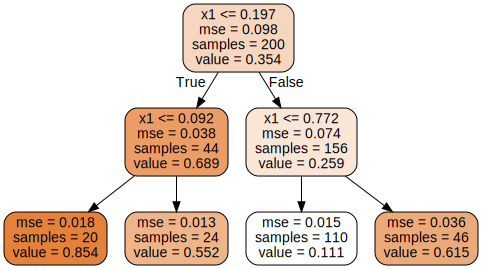

In [20]:
import graphviz

with open(regression_tree_path) as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

In [18]:
# My Notes: 0.111 is obtained getting the average target value, the y values, of the 110 training instances in the associated leaf node

Saving figure tree_regression_plot


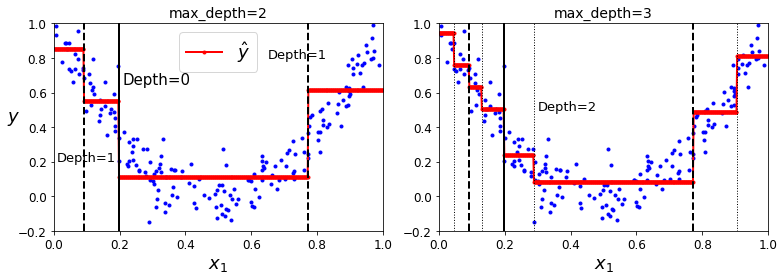

In [19]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.subplot(122)
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

save_fig("tree_regression_plot")
plt.show()

In [20]:
# My Notes: Notice Depth 0 is wider compared to Depth 1, the mse is larger

Saving figure tree_regression_regularization_plot


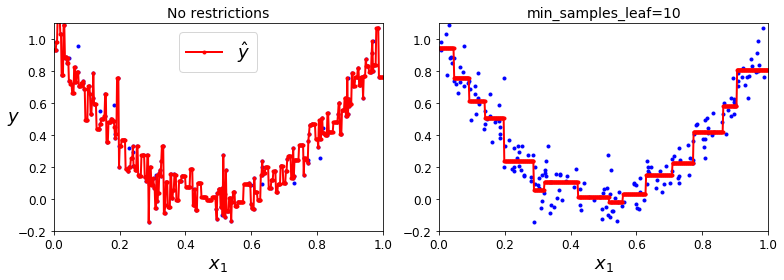

In [21]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.subplot(122)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

save_fig("tree_regression_regularization_plot")
plt.show()

# Instability

Saving figure sensitivity_to_rotation_plot


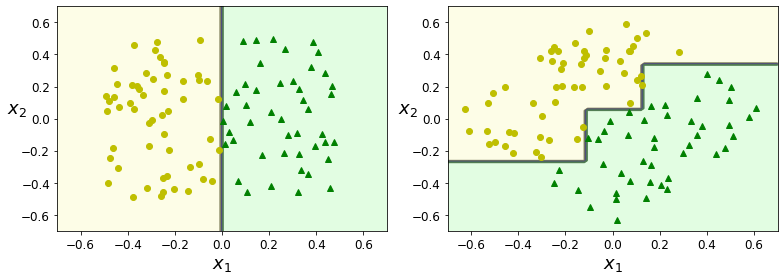

In [22]:
# np.random.seed(6)
# Xs = np.random.rand(100, 2) - 0.5
# ys = (Xs[:, 0] > 0).astype(np.float32) * 2

# angle = np.pi / 4
# rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
# Xsr = Xs.dot(rotation_matrix)

# tree_clf_s = DecisionTreeClassifier(random_state=42)
# tree_clf_s.fit(Xs, ys)
# tree_clf_sr = DecisionTreeClassifier(random_state=42)
# tree_clf_sr.fit(Xsr, ys)

# plt.figure(figsize=(11, 4))
# plt.subplot(121)
# plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
# plt.subplot(122)
# plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)

# save_fig("sensitivity_to_rotation_plot")
# plt.show()

# Practice
np.random.seed(6)
Xs = np.random.rand(100,2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)              
plt.subplot(122)
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)

save_fig("sensitivity_to_rotation_plot")
plt.show()

In [23]:
# My Notes: The graph on the right is unnecessarily convoluted when the instances are flipped 90 degree, the model will not generalize well on new instances

Saving figure decision_tree_instability_plot


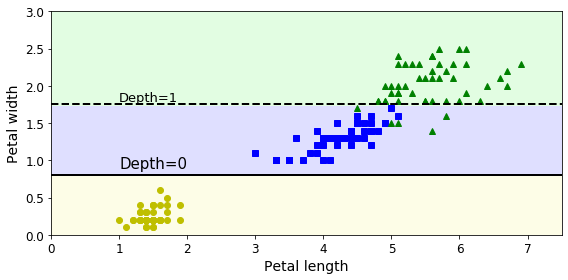

In [24]:
# plt.figure(figsize=(8, 4))
# plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False)
# plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
# plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
# plt.text(1.0, 0.9, "Depth=0", fontsize=15)
# plt.text(1.0, 1.80, "Depth=1", fontsize=13)

# save_fig("decision_tree_instability_plot")
# plt.show()

# Practice
plt.figure(figsize=(8,4))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)

save_fig("decision_tree_instability_plot")
plt.show()

In [25]:
# angle = np.pi / 180 * 20
# rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
# Xr = X.dot(rotation_matrix)

# tree_clf_r = DecisionTreeClassifier(random_state=42)
# tree_clf_r.fit(Xr, y)

# plt.figure(figsize=(8, 3))
# plot_decision_boundary(tree_clf_r, Xr, y, axes=[0.5, 7.5, -1.0, 1], iris=False)

# plt.show()

# Practice
angle = np.pi / 180 * 20
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xr = X.dot(rotation_matrix)

tree_clf_r = DecisionTreeClassifier(random_state=42)
tree_clf_r.fit(Xr, y)

plt.figure(figsize=(8,3))
plot_decision_boundary(tree_clf_r, Xr, y, axes=[0.5, 7.5, -1.0, 1], iris=False)

plt.show()

ValueError: shapes (200,1) and (2,2) not aligned: 1 (dim 1) != 2 (dim 0)

# Exercise solutions

## 1. to 6.

See appendix A.

## 7.

_Exercise: train and fine-tune a Decision Tree for the moons dataset._

a. Generate a moons dataset using `make_moons(n_samples=10000, noise=0.4)`.

Adding `random_state=42` to make this notebook's output constant:

In [25]:
# from sklearn.datasets import make_moons

# X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)

# Practice
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.4, random_state=42)

b. Split it into a training set and a test set using `train_test_split()`.

In [26]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Practice
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

c. Use grid search with cross-validation (with the help of the `GridSearchCV` class) to find good hyperparameter values for a `DecisionTreeClassifier`. Hint: try various values for `max_leaf_nodes`.

In [27]:
# from sklearn.model_selection import GridSearchCV

# params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
# grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1, verbose=1, cv=3)

# grid_search_cv.fit(X_train, y_train)

# Practice
from sklearn.model_selection import GridSearchCV

params = {'max_leaf_nodes': list(range(2,100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1, verbose=1, cv=3)

grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 464 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 882 out of 882 | elapsed:    1.4s finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [28]:
# grid_search_cv.best_estimator_

# Practice
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=4, random_state=42)

d. Train it on the full training set using these hyperparameters, and measure your model's performance on the test set. You should get roughly 85% to 87% accuracy.

By default, `GridSearchCV` trains the best model found on the whole training set (you can change this by setting `refit=False`), so we don't need to do it again. We can simply evaluate the model's accuracy:

In [29]:
# from sklearn.metrics import accuracy_score

# y_pred = grid_search_cv.predict(X_test)
# accuracy_score(y_test, y_pred)

# Practice
from sklearn.metrics import accuracy_score

y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.855

## 8.

_Exercise: Grow a forest._

a. Continuing the previous exercise, generate 1,000 subsets of the training set, each containing 100 instances selected randomly. Hint: you can use Scikit-Learn's `ShuffleSplit` class for this.

In [30]:
# from sklearn.model_selection import ShuffleSplit

# n_trees = 1000
# n_instances = 100

# mini_sets = []

# rs = ShuffleSplit(n_splits=n_trees, test_size=len(X_train) - n_instances, random_state=42)
# for mini_train_index, mini_test_index in rs.split(X_train):
#     X_mini_train = X_train[mini_train_index]
#     y_mini_train = y_train[mini_train_index]
#     mini_sets.append((X_mini_train, y_mini_train))

# Practice
from sklearn.model_selection import ShuffleSplit

n_trees = 1000 # My Notes: Number of trees
n_instances = 100 # My Notes: Number of instances

mini_sets = [] # My Notes: Add the training sets to the list

rs = ShuffleSplit(n_splits=n_trees, test_size=len(X_train) - n_instances, random_state=42) # My Notes: Split into 1,000 sets with 100 instances in each
for mini_train_index, mini_test_index in rs.split(X_train): # My Notes: Only get the training index NOT the test index
    X_mini_train = X_train[mini_train_index]
    y_mini_train = y_train[mini_train_index]
    mini_sets.append((X_mini_train, y_mini_train))

In [35]:
print("Total number of instances in X_train:",len(X_train))

Total number of instances in X_train: 800


In [32]:
# My Notes
print("Test size:",len(X_train) - n_instances) # 800 - 100 = 700

Test size: 700


In [33]:
# My Notes
# len(X_train)
X_mini_train.shape

(100, 2)

In [35]:
# My Notes
y_mini_train.shape

(100,)

In [36]:
# My Notes
len(mini_sets)

1000

b. Train one Decision Tree on each subset, using the best hyperparameter values found above. Evaluate these 1,000 Decision Trees on the test set. Since they were trained on smaller sets, these Decision Trees will likely perform worse than the first Decision Tree, achieving only about 80% accuracy.

In [44]:
# from sklearn.base import clone

# forest = [clone(grid_search_cv.best_estimator_) for _ in range(n_trees)]

# accuracy_scores = []

# for tree, (X_mini_train, y_mini_train) in zip(forest, mini_sets):
#     tree.fit(X_mini_train, y_mini_train)
    
#     y_pred = tree.predict(X_test)
#     accuracy_scores.append(accuracy_score(y_test, y_pred))

# np.mean(accuracy_scores)

# Practice
from sklearn.base import clone

forest = [clone(grid_search_cv.best_estimator_) for _ in range(n_trees)] # My Notes: Copy the grid_search_cv best hyper parameters 1000 times and put it in a list forest (see My Notes 2)
# My Notes 2: DecisionTreeClassifier(max_leaf_nodes=4, random_state=42)

accuracy_scores = []

for tree, (X_mini_train, y_mini_train) in zip(forest, mini_sets):
    tree.fit(X_mini_train, y_mini_train)

# My Notes: Tree = DecisionTreeClassifier(max_leaf_nodes=4, random_state=42)
    
    y_pred = tree.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    
np.mean(accuracy_scores)

0.817115

In [87]:
# My Notes
forest[0:5]

[DecisionTreeClassifier(max_leaf_nodes=4, random_state=42),
 DecisionTreeClassifier(max_leaf_nodes=4, random_state=42),
 DecisionTreeClassifier(max_leaf_nodes=4, random_state=42),
 DecisionTreeClassifier(max_leaf_nodes=4, random_state=42),
 DecisionTreeClassifier(max_leaf_nodes=4, random_state=42)]

c. Now comes the magic. For each test set instance, generate the predictions of the 1,000 Decision Trees, and keep only the most frequent prediction (you can use SciPy's `mode()` function for this). This gives you _majority-vote predictions_ over the test set.

In [88]:
# Y_pred = np.empty([n_trees, len(X_test)], dtype=np.uint8)

# for tree_index, tree in enumerate(forest):
#     Y_pred[tree_index] = tree.predict(X_test)

# Practice
Y_pred = np.empty([n_trees, len(X_test)], dtype=np.uint8) # My Notes: Create an array of shape of (1000, 200)

for tree_index, tree in enumerate(forest):
    Y_pred[tree_index] = tree.predict(X_test) # My Notes: Generating the 1000 predictions of the decision trees

In [78]:
# My Notes
Y_pred.shape

(1000, 200)

In [85]:
Y_pred.shape

(1000, 200)

In [58]:
# My Notes: randomly initialize the numbers for an array
np.empty([2,2], dtype=int)

array([[1205157792,        644],
       [         0,          0]])

In [60]:
# from scipy.stats import mode

# y_pred_majority_votes, n_votes = mode(Y_pred, axis=0)

# Practice
from scipy.stats import mode

y_pred_majority_votes, n_votes = mode(Y_pred, axis=0)

In [63]:
y_pred_majority_votes.shape

(1, 200)

In [64]:
n_votes.shape

(1, 200)

d. Evaluate these predictions on the test set: you should obtain a slightly higher accuracy than your first model (about 0.5 to 1.5% higher). Congratulations, you have trained a Random Forest classifier!

In [65]:
# accuracy_score(y_test, y_pred_majority_votes.reshape([-1]))

# Practice
accuracy_score(y_test, y_pred_majority_votes.reshape([-1]))

0.85

In [69]:
# My Notes
y_pred_majority_votes.reshape([-1]).shape

(200,)

# My Notes

In [76]:
a = np.empty([5,3,5], dtype=int)
a.shape

(5, 3, 5)

In [77]:
a.reshape([5,-1]).shape

(5, 15)